In [2]:
import pandas as pd

## READING DATA

In [3]:
data = pd.read_csv('customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.drop(['Age','Genre','CustomerID'],axis=1,inplace=True)

In [5]:
data.shape

(200, 2)

In [6]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## PLOTING OF COORDINATES

In [7]:
import matplotlib.pyplot as plt

In [8]:
x = list(data['Annual Income (k$)'])
y = list(data['Spending Score (1-100)'])

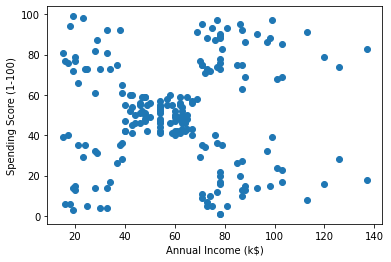

In [9]:
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x,y)

## CALCULATIONS

### DENDOGRAM

In [10]:
import scipy.cluster.hierarchy as sch

##### Single Linkage

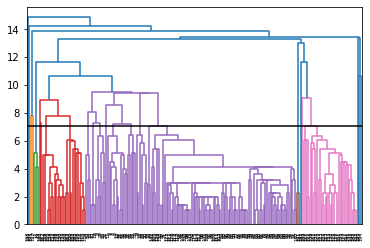

In [11]:
linked = sch.linkage(data,'single')
sch.dendrogram(linked)
plt.axhline(y=7.1,color='black')
plt.show()

##### Complete Linkage

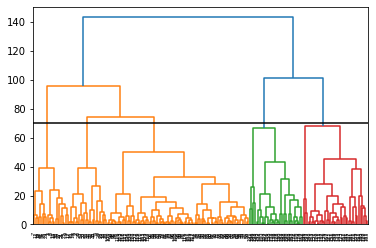

In [12]:
linked = sch.linkage(data,'complete')
sch.dendrogram(linked)
plt.axhline(y=70,color='black')
plt.show()

##### Average Linkage

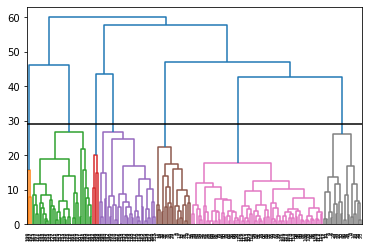

In [13]:
linked = sch.linkage(data,'average')
sch.dendrogram(linked)
plt.axhline(y=29,color='black')
plt.show()

##### Centroid Linkage

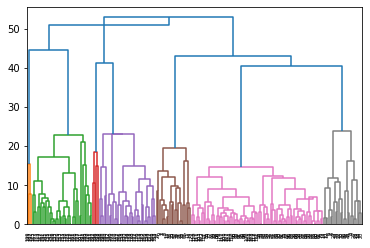

In [14]:
linked = sch.linkage(data,'centroid')
sch.dendrogram(linked)
plt.axhline(y=120,color='black')
plt.show()

### DISTANCE CALCULATION

##### 1. Euclidean Distance

In [15]:
def eudist(point1,point2):
    """eudist(point1,point2)

To find the the "Euclidean" distance between points given as arguments
Returns the distance."""
    x2 = (point1[0]-point2[0])**2
    y2 = (point1[1]-point2[1])**2
    dist = (x2+y2)**0.5
    return dist

##### 2. Manhattan Distance

In [16]:
def mandist(point1,point2):
    """mandist(point1,point2)

To find the the "Manhatten" distance between points given as arguments
Returns the distance."""
    x = abs(point1[0]-point2[0])
    y = abs(point1[1]-point2[1])
    dist = x+y
    return dist

## CLUSTERING

In [17]:
#making list of all points

points = list(zip(x,y))
points

[(15, 39),
 (15, 81),
 (16, 6),
 (16, 77),
 (17, 40),
 (17, 76),
 (18, 6),
 (18, 94),
 (19, 3),
 (19, 72),
 (19, 14),
 (19, 99),
 (20, 15),
 (20, 77),
 (20, 13),
 (20, 79),
 (21, 35),
 (21, 66),
 (23, 29),
 (23, 98),
 (24, 35),
 (24, 73),
 (25, 5),
 (25, 73),
 (28, 14),
 (28, 82),
 (28, 32),
 (28, 61),
 (29, 31),
 (29, 87),
 (30, 4),
 (30, 73),
 (33, 4),
 (33, 92),
 (33, 14),
 (33, 81),
 (34, 17),
 (34, 73),
 (37, 26),
 (37, 75),
 (38, 35),
 (38, 92),
 (39, 36),
 (39, 61),
 (39, 28),
 (39, 65),
 (40, 55),
 (40, 47),
 (40, 42),
 (40, 42),
 (42, 52),
 (42, 60),
 (43, 54),
 (43, 60),
 (43, 45),
 (43, 41),
 (44, 50),
 (44, 46),
 (46, 51),
 (46, 46),
 (46, 56),
 (46, 55),
 (47, 52),
 (47, 59),
 (48, 51),
 (48, 59),
 (48, 50),
 (48, 48),
 (48, 59),
 (48, 47),
 (49, 55),
 (49, 42),
 (50, 49),
 (50, 56),
 (54, 47),
 (54, 54),
 (54, 53),
 (54, 48),
 (54, 52),
 (54, 42),
 (54, 51),
 (54, 55),
 (54, 41),
 (54, 44),
 (54, 57),
 (54, 46),
 (57, 58),
 (57, 55),
 (58, 60),
 (58, 46),
 (59, 55),
 (59,

## LINKAGES

##### 1. SINGLE LINKAGE

In [18]:
def single_linkage(l1,l2,dmethod = eudist):
    """single_linkage(l1,l2,dmethod = eudist)

Returns the single linkage distance between two clusters.
Optional keyword arguments:
dmethod : affinity method to be used to find distance between points"""
    dist = []
    for i in l1:
        for j in l2:
            d = dmethod(points[i],points[j])
            dist.append(d)
    return min(dist)

##### 2. COMPLETE LINKAGE

In [19]:
def complete_linkage(l1,l2,dmethod=eudist):
    """complete_linkage(l1,l2,dmethod = eudist)

Returns the complete linkage distance between two clusters.
Optional keyword arguments:
dmethod : affinity method to be used to find distance between points"""
    dist = []
    for i in l1:
        for j in l2:
            d = dmethod(points[i],points[j])
            dist.append(d)
    return max(dist)

##### 3. AVERAGE LINKAGE

In [20]:
def average_linkage(l1,l2,dmethod=eudist):
    """average_linkage(l1,l2,dmethod = eudist)

Returns the average linkage distance between two clusters.
Optional keyword arguments:
dmethod : affinity method to be used to find distance between points"""
    s = 0
    for i in l1:
        for j in l2:
            s += dmethod(points[i],points[j])
    return s/len(l1)/len(l2)

##### 4. CENTROID LINKAGE

In [32]:
def centroid_linkage(l1,l2,dmethod=eudist):
    """ward_linkage(l1,l2,dmethod = eudist)

Returns the ward linkage distance between two clusters.
Optional keyword arguments:
dmethod : affinity method to be used to find distance between points"""
    X,Y = 0,0
    
    for p in l1:
        X+=points[p][0]
        Y+=points[p][1]
    l = len(l1)
    X /= l
    Y /= l
    centroid1 = (X,Y)

    for p in l2:
        X+=points[p][0]
        Y+=points[p][1]
    l = len(l2)
    X /= l
    Y /= l
    centroid2 = (X,Y)

    return dmethod(centroid1,centroid2)

## MAKING OF CLUSTERS

##### FINDING MINIMUM DISTANT POINT IN THE WHOLE MATRIX

In [22]:
def minimum(matrix):
    """minimum(matrix)

To find the the minimum element in the list
Returns the element found."""
    p = [1,0]
    for i in range(len(matrix)):
        for j in range(i):
            if(matrix[p[0]][p[1]]>=matrix[i][j]):
                p[0]=i
                p[1]=j
    return p

#### CLUSTER MAKING FUNCTION

In [23]:
def make_cluster(linkage = single_linkage,affinity = eudist,n_clusters = 1):
    """make_cluster(linkage = single_linkage,affinity = eudist,n_clusters = 1)

Returns the clusters formed .
Optional keyword arguments:
dmethod : affinity method to be used to find distance between points"""
    clusters = [[i]for i in range(len(x))]    # initially making all points as clusters
    while len(clusters)>n_clusters:
        matrix = []
        for i in range(len(clusters)):
            matrix.append([linkage(clusters[i],clusters[j],affinity) for j in range(i+1)])
        m = minimum(matrix)
        a = clusters[m[0]]
        b = clusters[m[1]]
        clusters.remove(a)
        clusters.remove(b)
        a.extend(b)
        clusters.insert(0,a)
    return clusters

## PLOTTING THE CLUSTERS

In [24]:
def plot_cluster(clusters):
    import random as rd
    for i,c in enumerate(clusters):
        rgb = [rd.random() for i in range(3)]
        [plt.scatter(points[j][0],points[j][1],color=rgb) for j in c]
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')

# PLOTTED CLUSTERS

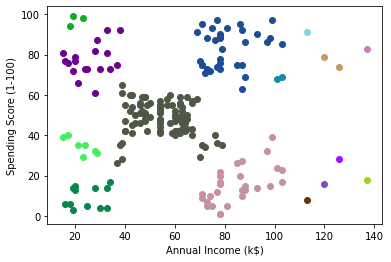

In [25]:
clusters = make_cluster(single_linkage,eudist,15)
plot_cluster(clusters)

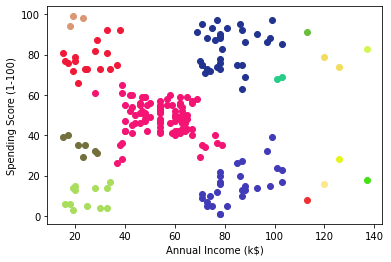

In [26]:
clusters = make_cluster(single_linkage,mandist,15)
plot_cluster(clusters)

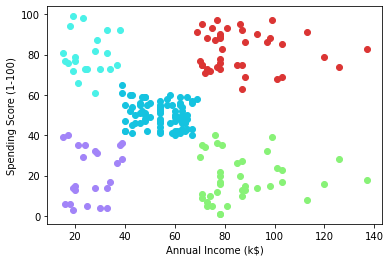

In [27]:
clusters = make_cluster(complete_linkage,eudist,5)
plot_cluster(clusters)

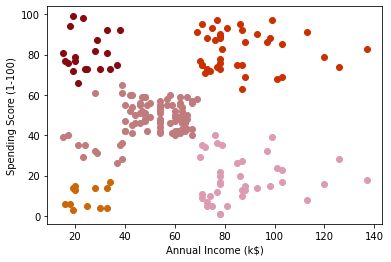

In [28]:
clusters = make_cluster(complete_linkage,mandist,5)
plot_cluster(clusters)

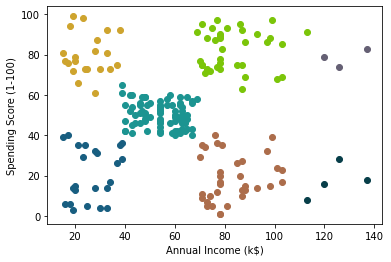

In [29]:
clusters = make_cluster(average_linkage,eudist,7)
plot_cluster(clusters)

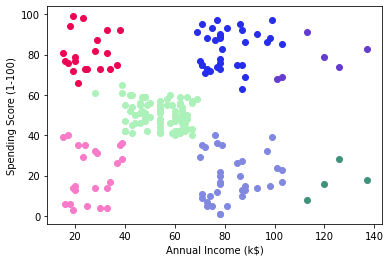

In [30]:
clusters = make_cluster(average_linkage,mandist,7)
plot_cluster(clusters)

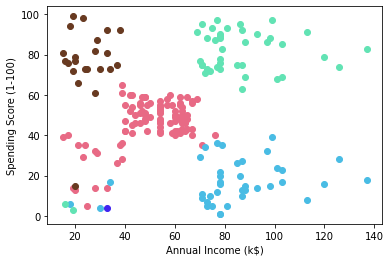

In [33]:
clusters = make_cluster(centroid_linkage,eudist,5)
plot_cluster(clusters)

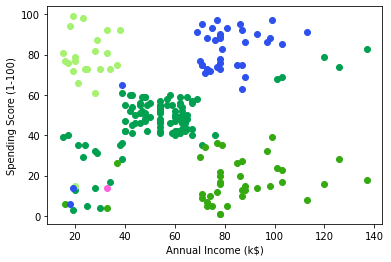

In [34]:
clusters = make_cluster(centroid_linkage,mandist,5)
plot_cluster(clusters)